In [118]:
import pandas as pd

# load data
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"

dataset = pd.read_csv(url, sep=",")

dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [119]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [120]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


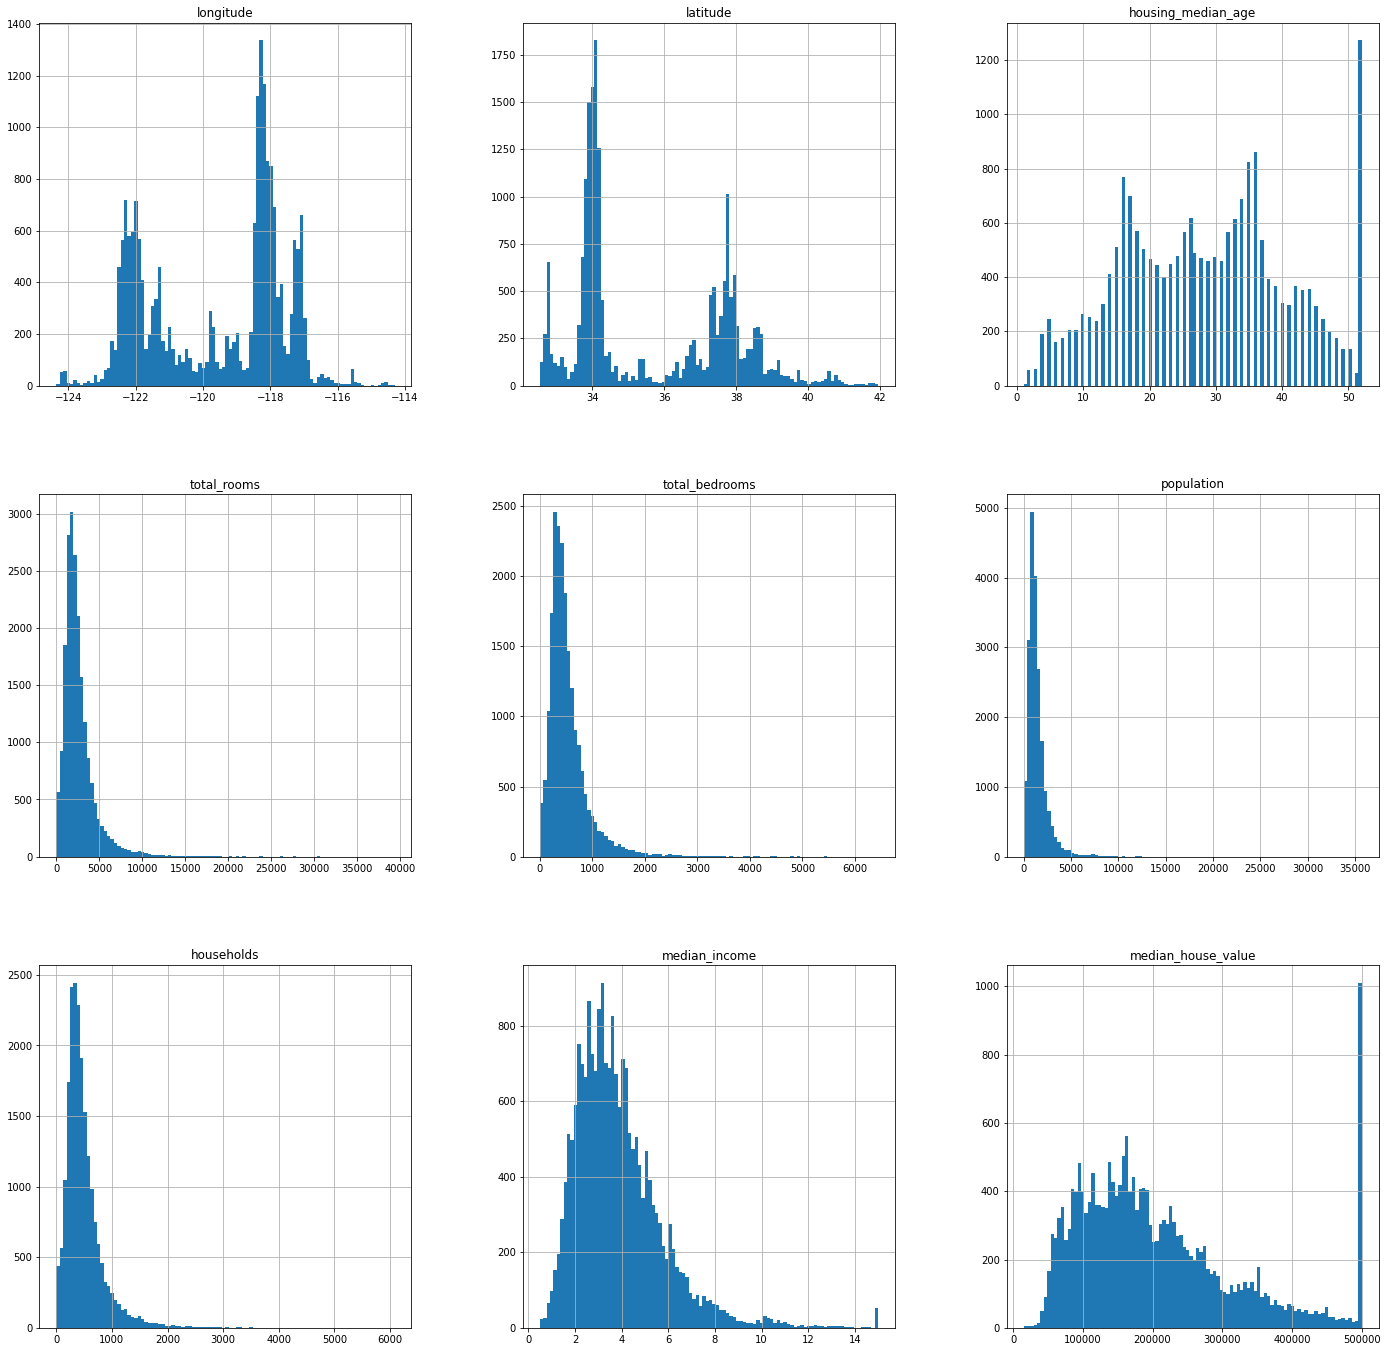

In [121]:
import matplotlib.pyplot as plt

dataset.hist(figsize=(24, 24), bins=100)
plt.show()

In [122]:
# attributes = ["total_rooms", "total_bedrooms", "population", "households", "median_income", "median_house_value"]
# pd.plotting.scatter_matrix(frame=dataset, figsize=(25,25), alpha=0.5)
# plt.show()

In [123]:
correlation = dataset.corr()
correlation["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [124]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


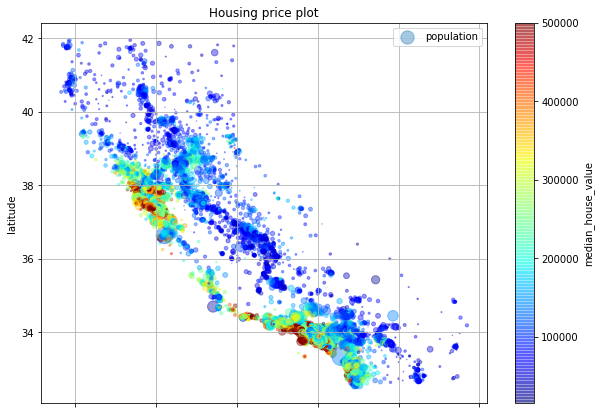

In [125]:
dataset.plot(
    kind="scatter", # type of graph
    x="longitude", # x axis
    y="latitude", # y axis
    alpha=0.4, 
    s=dataset["population"] / 100, 
    label="population", # labe in right corner
    figsize=(10,7), # size of image
    c="median_house_value", 
    colormap=plt.get_cmap("jet"), # select color map
    colorbar=True,  # that scale on the right
    legend=True,  # population
    title="Housing price plot",
    grid=True,
)

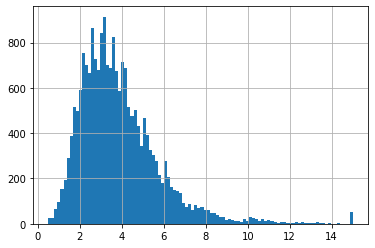

In [126]:
dataset["median_income"].hist(bins=100)

0    5
1    5
2    5
3    4
4    3
Name: income_cat, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]


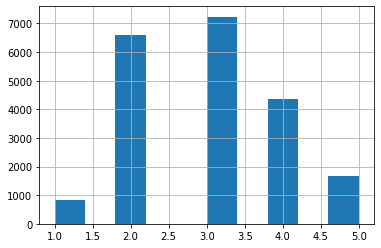

In [127]:
import numpy as np
# split the data into 5 categories from 1.5 to 6 for later stratification
dataset["income_cat"] = pd.cut(dataset["median_income"],
                                       bins=[0., 1.5, 3.0, 4.5, 6.5, np.inf],
                                       labels=[1,2,3,4,5])

print(dataset["income_cat"].head()) # now the data are labeld into 5 categories
dataset["income_cat"].hist()
plt.show()

In [128]:
dataset.iloc[0]

longitude              -122.23
latitude                 37.88
housing_median_age        41.0
total_rooms              880.0
total_bedrooms           129.0
population               322.0
households               126.0
median_income           8.3252
median_house_value    452600.0
ocean_proximity       NEAR BAY
income_cat                   5
Name: 0, dtype: object

In [129]:
from sklearn.model_selection import StratifiedShuffleSplit

# X - target dataset to be stratified
# y - dataset based ony X will be stratified
split = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
for train_index, test_index in split.split(X=dataset, y=dataset["income_cat"]):
  strat_train_set = dataset.loc[train_index]
  strat_test_set = dataset.loc[test_index]


In [130]:
# now when you compare the positions of these rows after stratification, they
# will have different values than original dataset at positions 0 and 1

# separete two rows two check the prediction in the end
first_row = strat_train_set.iloc[:4]
dataset = dataset.iloc[4:]


X_test1 = first_row.drop(["median_house_value", "income_cat"], axis=1)
y_test1 = first_row["median_house_value"].copy()



In [131]:
X_train = strat_train_set.drop(["median_house_value", "income_cat"], axis=1)
y_train = strat_train_set["median_house_value"].copy()

X_test = strat_test_set.drop(["median_house_value", "income_cat"], axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [132]:
type(X_train)


pandas.core.frame.DataFrame

In [133]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

housing_numeric = X_train.drop(["ocean_proximity"], axis=1)
num_pipeline = Pipeline([
                         ("imputer", SimpleImputer(strategy="median")),
                         ("std_scaler", StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_numeric)

In [134]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_numeric)
print(num_attribs)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
                                   ("num", num_pipeline, num_attribs),
                                   ("cat", OneHotEncoder(), cat_attribs)
])
housing_prepared = full_pipeline.fit_transform(X_train)

['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


In [135]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, y_train)

# lets try the model out on some data
some_data = housing.iloc[:4]  # seem to return number of rows based on the inputed numer, similar to .head()
some_labels = housing_labels.iloc[:4]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions: ", lin_reg.predict(some_data_prepared))
print("Labels: ", list(some_labels))

# predictions vs labels will have some difference

NameError: ignored

In [ ]:
"""# this is only a test based on exercise from book, seems like svm cannot be really used fot this problem
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(kernel="linear")
svm_reg.fit(X_train, y_train)

# lets try the model out on some data
some_data_prepared = full_pipeline.transform(X_test1)
prediction = svm_reg.predict(some_data_prepared)
actual = list(y_test1)
print("Predictions: ", prediction)
print("Labels: ", actual)
print("difference:", [f"{x:.0f}" for x in abs(prediction-actual)])
print("difference mean:", sum(abs(prediction-actual))/4)

# predictions vs labels will have some difference"""

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
lin_reg_rmse_scores = np.sqrt(-scores, dtype=np.float32)

def display_scores(scores):
  print("scores:", scores)
  print("mean", scores.mean())
  print("standart deviation", scores.std())

# here decision tree performs even worse than linear regression (probably due to overfitting)
print(display_scores(lin_reg_rmse_scores))

In [ ]:
from sklearn.metrics import mean_squared_error

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = lin_reg.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print("average:", sum(abs(final_predictions-list(y_test)))/len(y_test), "final mse",
      final_mse, "final rmse", final_rmse, sep="\n")

